# Distances

A common task when dealing with data is computing the distance between two points.

We can use [`scipy.spatial.distance`](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html) to compute a variety of distances.

In [1]:
%pylab inline
import scipy.spatial.distance as distance

Populating the interactive namespace from numpy and matplotlib


A data set is a collection observations, each of which may have several features.  We'll consider the situation where the data set is a matrix `X`, where each row `X[i]` is an observation.  We'll use `n` to denote the number of observations and `p` to denote the number of features, so `X` is a $n \times p$ matrix.

For example, we might sample from a circle (with some gaussian noise)

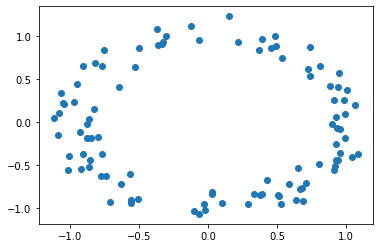

In [12]:
def sample_circle(n, r=1, sigma=0.1):
    """
    sample n points from a circle of radius r
    add Gaussian noise with variance sigma^2
    """
    X = np.random.randn(n,2)
    X = r * X / np.linalg.norm(X,axis=1).reshape(-1,1)
    return X + sigma * np.random.randn(n,2)

X = sample_circle(100)
plt.scatter(X[:,0], X[:,1])
plt.show()

TODO: define a few distances

## Pairwise Distances

TODO: scipy.spatial.pdist